# Processo analítico criado para gerara gráficos de comparação da quantidade de focos dos satélites AQUA e SNPP

In [1]:
# Importação de bibliotecas de referência
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
focos = pd.read_csv('./dados_geral.csv', index_col=0, parse_dates=[1])

In [3]:
focos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9629 entries, 0 to 9628
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_mes  9629 non-null   datetime64[ns]
 1   satelite  9629 non-null   object        
 2   id_1      9629 non-null   int64         
 3   estado    9629 non-null   object        
 4   bioma     9613 non-null   object        
 5   qtd       9629 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 526.6+ KB


In [8]:
focos = focos[~focos.bioma.isnull()]

In [25]:
for bioma in focos.bioma.unique():
#     print("\n\n ",bioma)
    focos_bioma = focos[focos.bioma == bioma][["data_mes", "satelite", "qtd"]]
    acum = focos_bioma.pivot_table(index='data_mes', columns=[ 'satelite'], aggfunc="mean", values='qtd', margins=False )
    acum = pd.DataFrame(acum.to_records())
    acum['ano']=acum.data_mes.dt.year
    acum['mes'] = acum.data_mes.dt.month
    for ano in range(2012,2021):
        # filtra dados para o ano 
            focos_bioma_ano = focos_bioma[focos_bioma.data_mes.dt.year == int(ano)]

            acum = focos_bioma_ano.pivot_table(index='data_mes', columns=[ 'satelite'], aggfunc="mean", values='qtd', margins=False )
            acum = pd.DataFrame(acum.to_records())

In [49]:
ano

2020

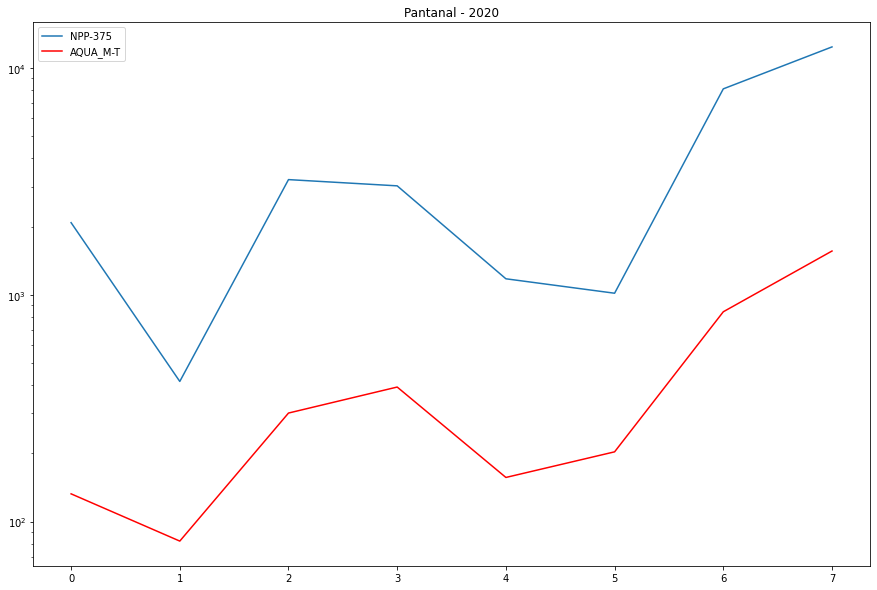

In [50]:
acum["NPP-375"].plot(logy=True, figsize=(15,10))
acum["AQUA_M-T"].plot(color='r')
plt.title('{} - {}'.format(bioma, ano))
plt.legend();

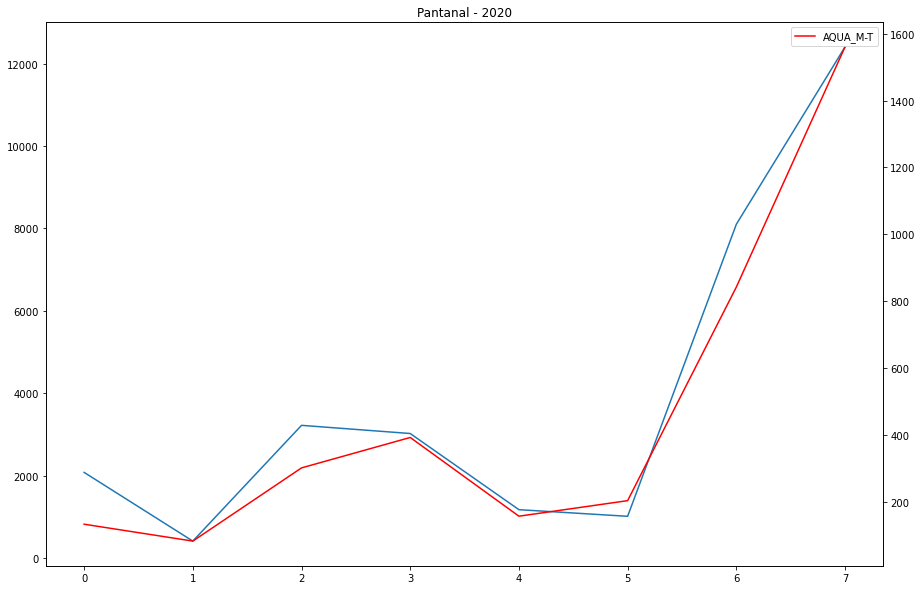

In [54]:
acum["NPP-375"].plot(figsize=(15,10))
acum["AQUA_M-T"].plot(color='r',secondary_y=True)
plt.title('{} - {}'.format(bioma, ano))
plt.legend();

In [30]:
acum["aqua_pct"] = acum["AQUA_M-T"]/acum["AQUA_M-T"].sum()
acum["npp_pct"] = acum["NPP-375"]/acum["NPP-375"].sum()

In [31]:
acum

,data_mes,AQUA_M-T,NPP-375,aqua_pct,npp_pct
0,2020-01-01,132.5,2081.5,0.036108,0.066199
1,2020-02-01,82.0,415.0,0.022346,0.013198
2,2020-03-01,301.0,3223.0,0.082028,0.102503
3,2020-04-01,392.0,3025.0,0.106827,0.096206
4,2020-05-01,156.5,1177.0,0.042649,0.037433
5,2020-06-01,203.0,1016.5,0.055321,0.032328
6,2020-07-01,842.0,8101.0,0.229459,0.257641
7,2020-08-01,1560.5,12404.0,0.425262,0.394492


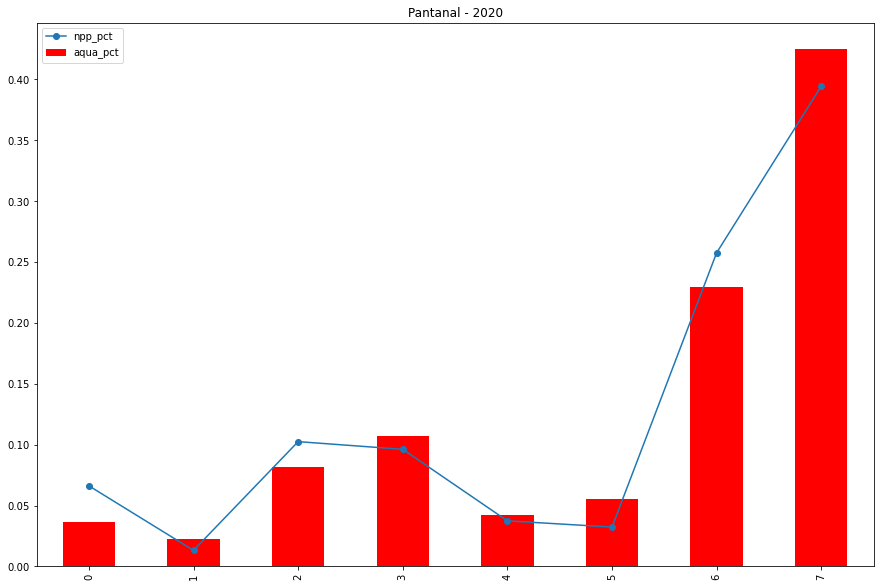

In [51]:
acum["npp_pct"].plot(marker='o', figsize=(15,10))
acum["aqua_pct"].plot(kind='bar',color='r')
plt.title('{} - {}'.format(bioma, ano))
plt.legend();